In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Status_Analysis.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Online_Services.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/a_IBM Telco Customers Churn Datasets.xlsx
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Customer_Info.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/TELCO ER Diagram.png
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Service_Options.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Location_Data.csv
/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Payment_Info.csv


# Read in Data

In [2]:
status_analysis = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Status_Analysis.csv')
Online_Services = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Online_Services.csv')
Customer_Info = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Customer_Info.csv')
Service_Options = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Service_Options.csv')
Location_Data = pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Location_Data.csv')
Payment_Info =  pd.read_csv('/kaggle/input/why-do-customers-leave-can-you-spot-the-churners/Payment_Info.csv')



In [3]:
result = pd.merge(status_analysis,Online_Services, how="inner", on="customer_id").merge(Customer_Info,how="inner", on="customer_id").merge(Service_Options,how="inner", on="customer_id").merge(Location_Data, how="inner", on="customer_id").merge(Payment_Info,how="inner", on="customer_id")

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
result.head()

,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,phone_service_x,internet_service_x,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,tenure,internet_service_y,phone_service_y,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,country,state,city,zip_code,total_population,latitude,longitude,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,Female,37,No,No,Yes,No,0,Yes,9,Yes,Yes,No,16,Yes,NaN,Yes,2,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,5,5414,Stayed,66,No,0,Not Applicable,NaN,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable,Male,46,No,No,No,No,0,No,9,Yes,Yes,Yes,10,No,NaN,No,0,United States,California,Glendale,91206,31297,34.162515,-118.203869,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic,Male,50,No,No,No,No,0,No,4,Yes,Yes,No,30,Yes,Offer E,No,0,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Male,78,No,Yes,Yes,No,0,Yes,13,Yes,Yes,No,4,Yes,Offer D,Yes,1,United States,California,Martinez,94553,46677,38.014457,-122.115432,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic,Female,75,No,Yes,Yes,No,0,Yes,3,Yes,Yes,No,11,Yes,NaN,Yes,3,United States,California,Camarillo,93010,42853,34.227846,-119.079903,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


# Data Cleaning & Exploratory Data Analysis

In [11]:
result.isna().sum()

customer_id                             0
satisfaction_score                      0
cltv                                    0
customer_status                         0
churn_score                             0
churn_label                             0
churn_value                             0
churn_category                          0
churn_reason                         5174
phone_service_x                         0
internet_service_x                      0
online_security                         0
online_backup                           0
device_protection                       0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                        0
streaming_music                         0
internet_type                        1526
gender                                  0
age                                     0
under_30                                0
senior_citizen                          0
partner                           

In [5]:
result.shape

(7043, 53)

In [16]:
result.describe()

,satisfaction_score,cltv,churn_score,churn_value,age,number_of_dependents,tenure,avg_monthly_gb_download,number_of_referrals,zip_code,total_population,latitude,longitude,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3.244924,4400.295755,58.505040,0.265370,46.509726,0.468692,32.371149,20.515405,1.951867,93486.071134,22139.814568,36.197455,-119.756684,64.761692,22.958954,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,1.201657,1183.057152,21.170031,0.441561,16.750352,0.962802,24.559481,20.418940,3.001199,1856.768045,21152.174407,2.468929,2.154425,30.090047,15.448113,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.000000,2003.000000,5.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,90001.000000,11.000000,32.555828,-124.301372,18.250000,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,3.000000,3469.000000,40.000000,0.000000,32.000000,0.000000,9.000000,3.000000,0.000000,92101.000000,2344.000000,33.990646,-121.788090,35.500000,9.210000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,3.000000,4527.000000,61.000000,0.000000,46.000000,0.000000,29.000000,17.000000,0.000000,93518.000000,17554.000000,36.205465,-119.595293,70.350000,22.890000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,4.000000,5380.500000,75.500000,1.000000,60.000000,0.000000,55.000000,27.000000,3.000000,95329.000000,36125.000000,38.161321,-117.969795,89.850000,36.395000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,5.000000,6500.000000,96.000000,1.000000,80.000000,9.000000,72.000000,85.000000,11.000000,96150.000000,105285.000000,41.962127,-114.192901,118.750000,49.990000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


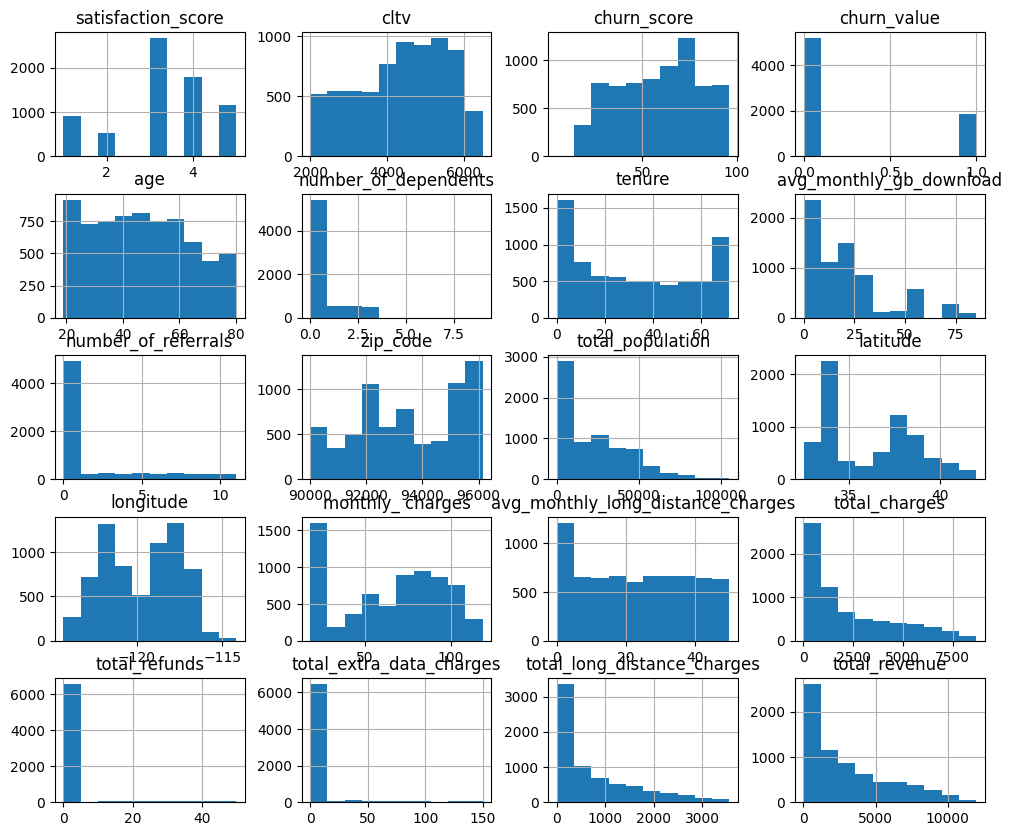

In [11]:
# Histograms for numerical features
import seaborn as sns
import matplotlib.pyplot as plt

result.hist(figsize=(12, 10))
plt.show()


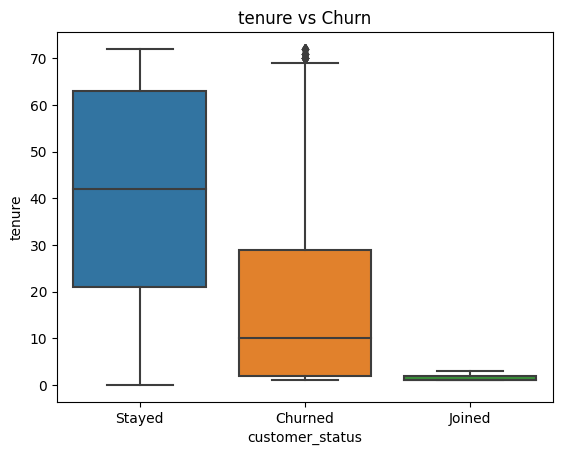

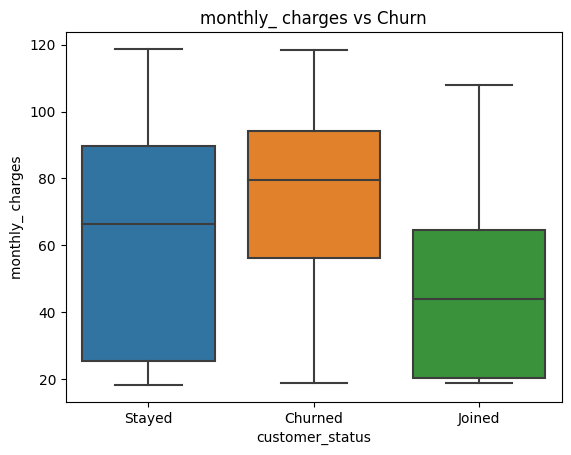

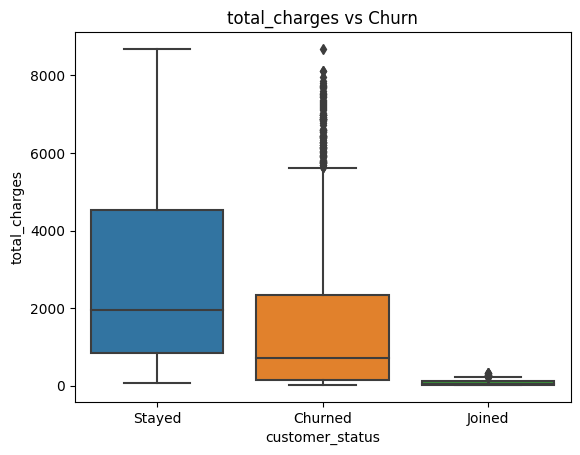

In [14]:

# Boxplots to compare numerical features with Churn
for col in ['tenure', 'monthly_ charges', 'total_charges']:
    sns.boxplot(data=result, x='customer_status', y=col)
    plt.title(f'{col} vs Churn')
    plt.show()

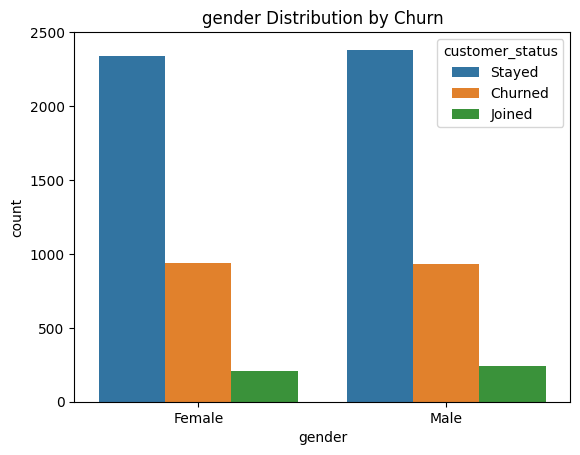

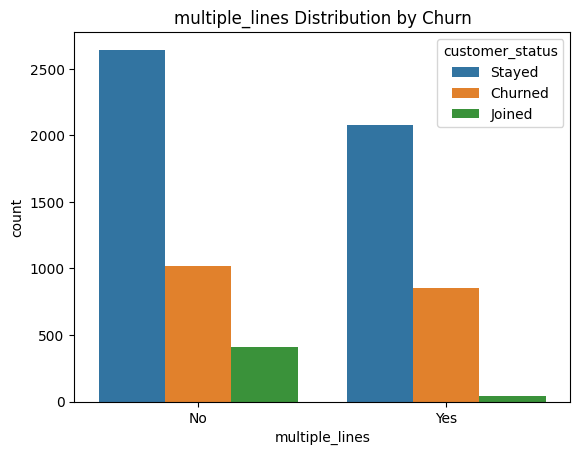

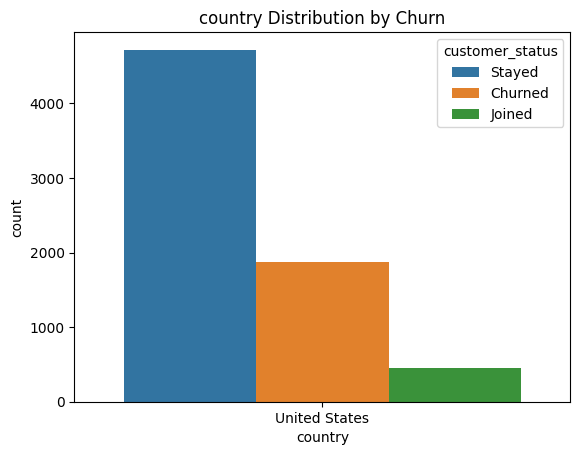

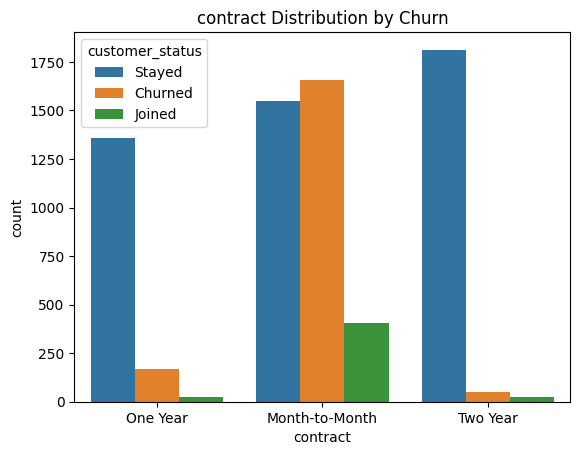

In [17]:
# Count plots for categorical features
categorical_features = ['gender', 'multiple_lines', 'country','contract']
for col in categorical_features:
    sns.countplot(data=result, x=col, hue='customer_status')
    plt.title(f'{col} Distribution by Churn')
    plt.show()


### Insights

From these visualizations we can see that the churn between men and women are equal, there is a slight increase between those who churned and did not have multiple lines, and those who did. Something interesting to note is that the number of customers who had month-to-month churned significantly higher than the other types of contracts.

### Average Amount Paid and Tenure of Customers who Churned 

In [23]:
temp = result.groupby('customer_status').agg({
    'monthly_ charges': 'mean',
    'tenure' : 'mean'


})

temp

,monthly_ charges,tenure
customer_status,,
Churned,74.441332,17.979133
Joined,43.474009,1.720264
Stayed,62.976388,41.018220


### Distribution of Categorical Variables

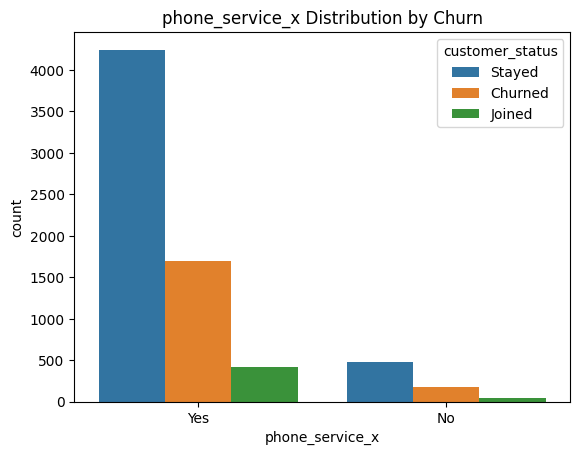

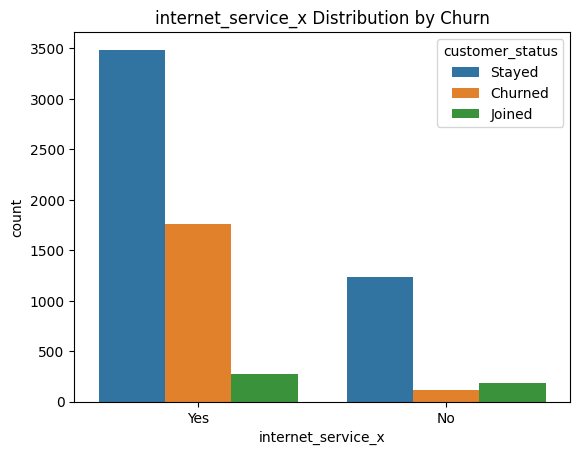

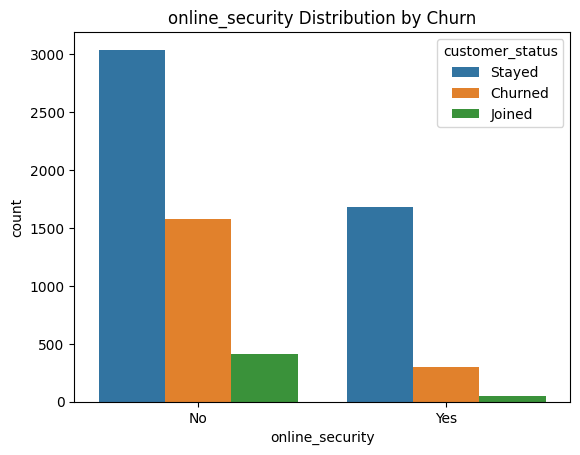

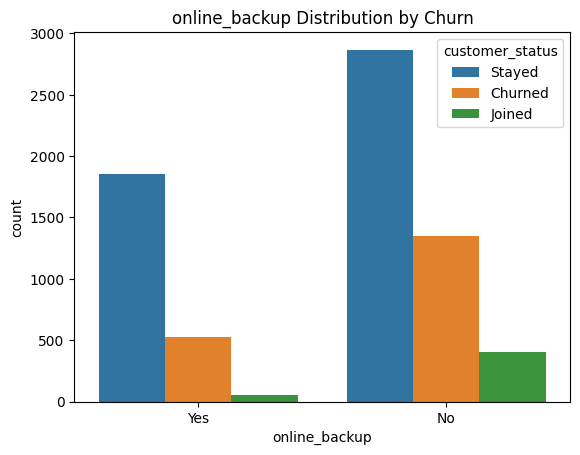

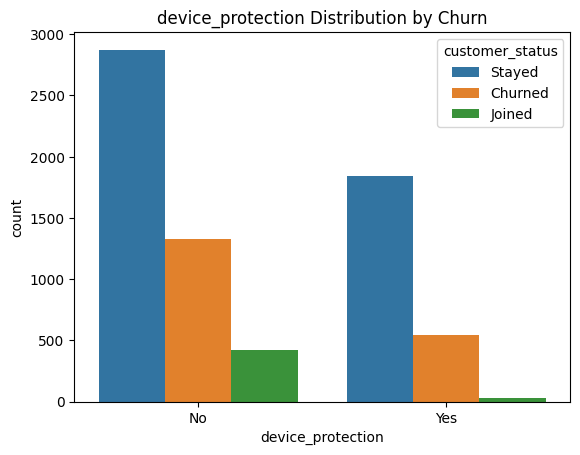

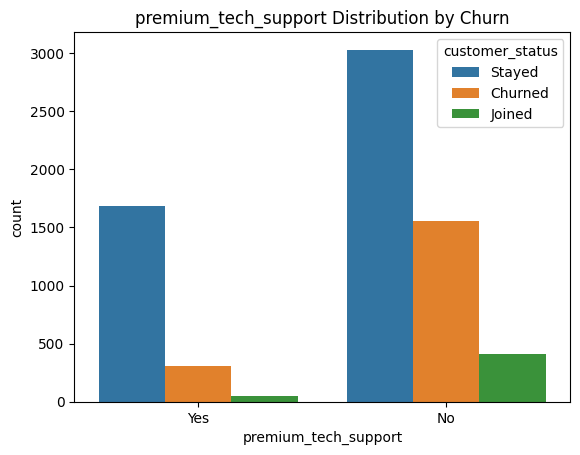

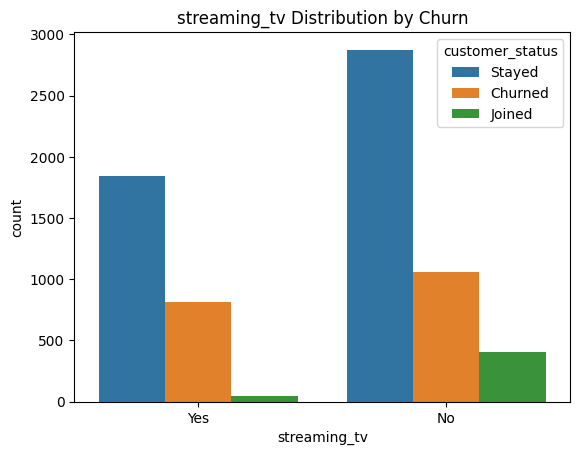

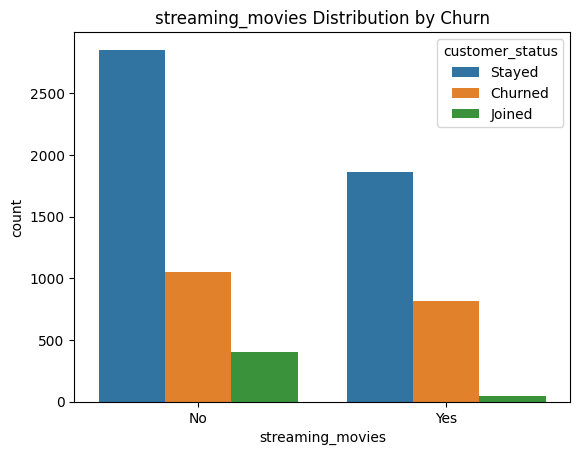

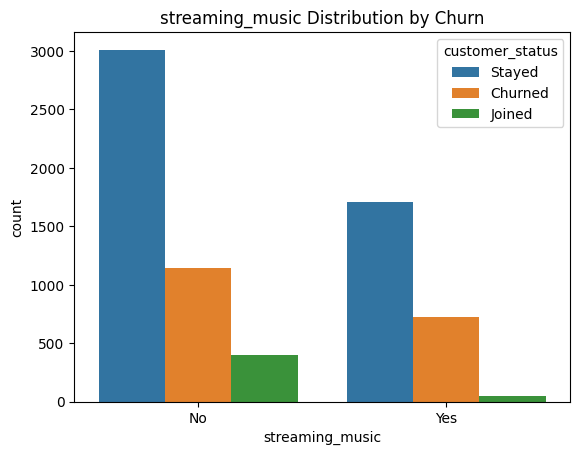

In [31]:
cat = ['phone_service_x','internet_service_x','online_security','online_backup','device_protection','premium_tech_support','streaming_tv','streaming_movies','streaming_music']

for col in cat:
    sns.countplot(data=result, x=col, hue='customer_status')
    plt.title(f'{col} Distribution by Churn')
    plt.show()


### Insights:

These charts show there is a significant amount of churn in the areas that have to do with online security, backup, device protection and premium tech support.

### Avg Charges & Tenure by Contract Type

In [42]:
temp = result.groupby('contract').agg({
    'monthly_ charges': 'mean',
    'tenure' : 'mean'


})

temp

,monthly_ charges,tenure
contract,,
Month-to-Month,65.586191,17.350416
One Year,65.658258,41.246452
Two Year,62.442990,53.862454


### Main Causes of Churn

In [64]:
temp = result.groupby('churn_category')['customer_id'].count()


TypeError: Series.sort_values() takes 1 positional argument but 2 were given

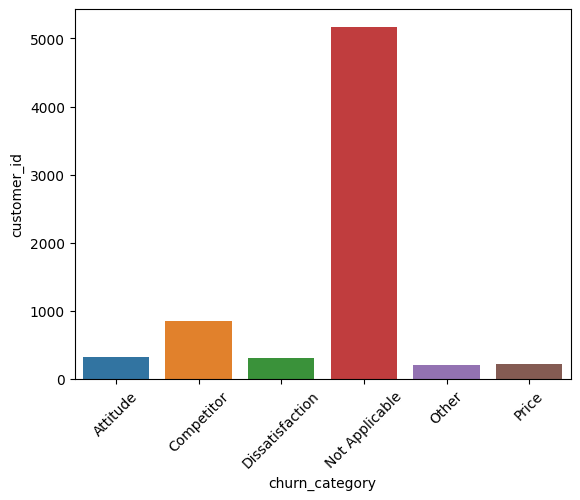

In [66]:
temp = temp.reset_index()


sns.barplot(data=temp, x='churn_category', y='customer_id')
plt.xticks(rotation=45)
plt.show()

### Churn Analysis Based on Internet Type 

In [70]:
temp = result.groupby(['internet_type','customer_status'])['customer_id'].count()
temp = temp.reset_index()


In [71]:
temp

,internet_type,customer_status,customer_id
0,Cable,Churned,213
1,Cable,Joined,56
2,Cable,Stayed,561
3,DSL,Churned,307
4,DSL,Joined,115
5,DSL,Stayed,1230
6,Fiber Optic,Churned,1236
7,Fiber Optic,Joined,101
8,Fiber Optic,Stayed,1698


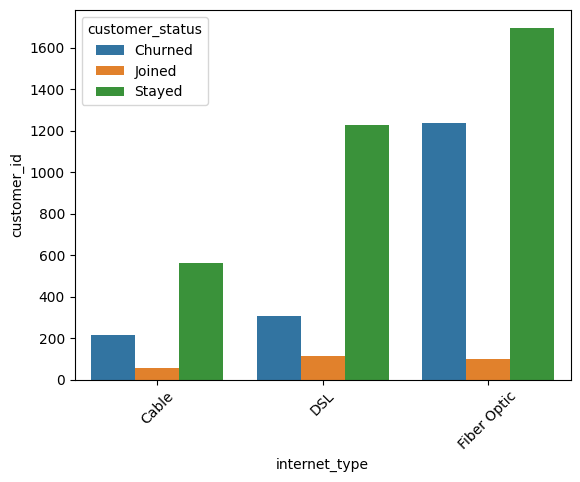

In [72]:
sns.barplot(data=temp, x='internet_type', y='customer_id', hue='customer_status')
plt.xticks(rotation=45)
plt.show()

### Insights:

Fiber Optic customers are significantly churning more than the other internet types

### 
I want to dive deeper into data which has to do with the internet type to see if there any insights which can be gathered


In [81]:
temp = result.groupby('internet_type').agg({
    'monthly_ charges': 'mean',
    'total_long_distance_charges' : 'mean',
    'tenure' : 'mean',
    'total_extra_data_charges' : 'mean'
    
})

temp

,monthly_ charges,total_long_distance_charges,tenure,total_extra_data_charges
internet_type,,,,
Cable,60.277530,592.855783,31.959036,7.638554
DSL,58.183172,618.191501,32.845036,9.455206
Fiber Optic,91.532389,852.458148,33.142998,8.685338


I filtered the data frame by the Fiber Optic internet type

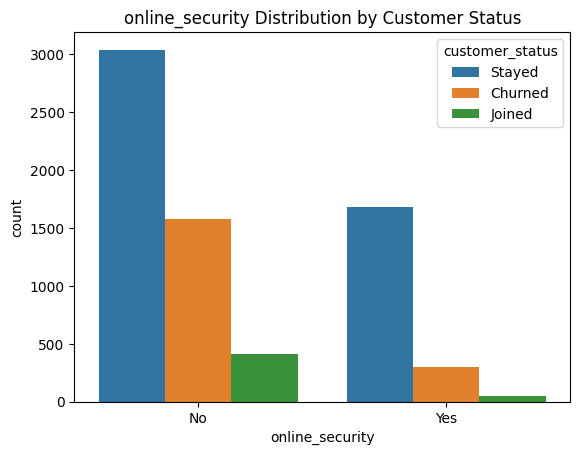

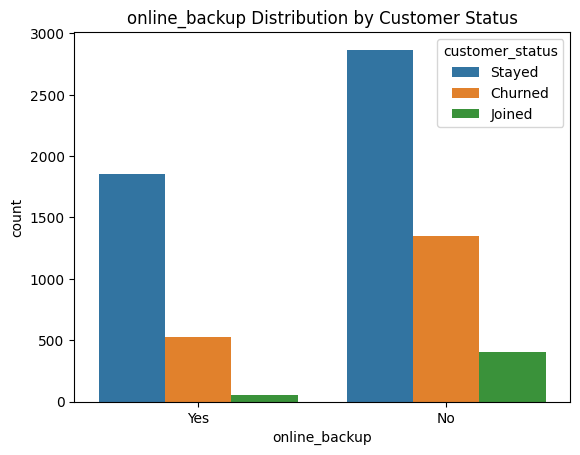

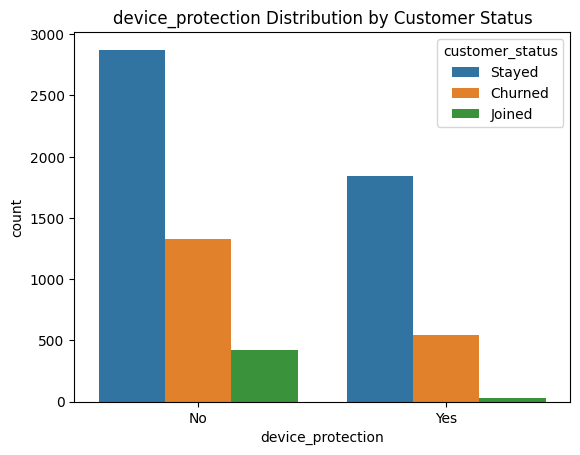

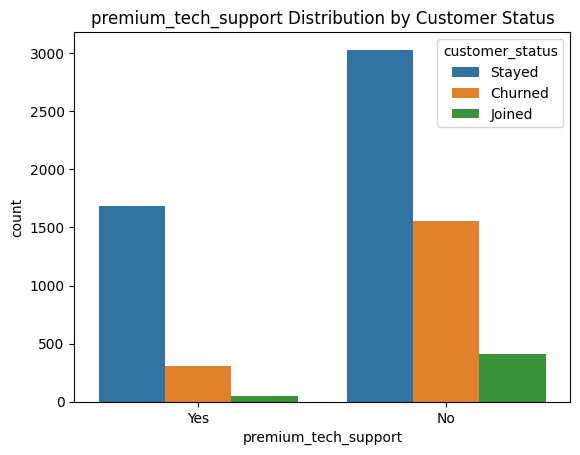

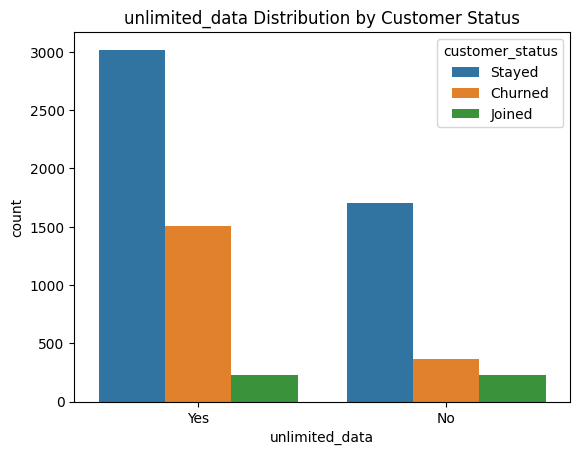

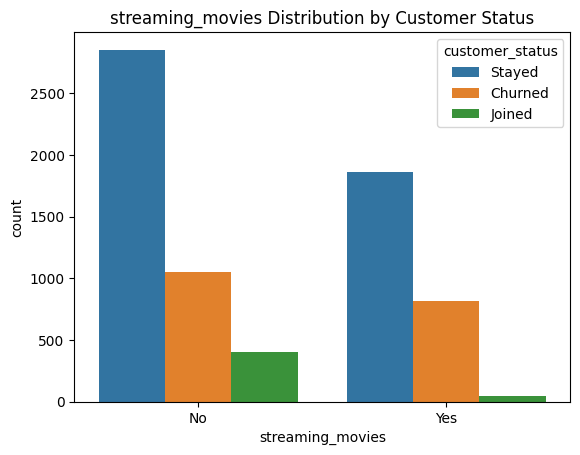

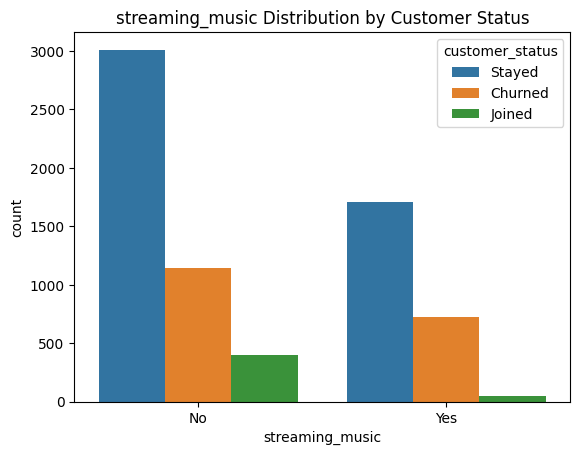

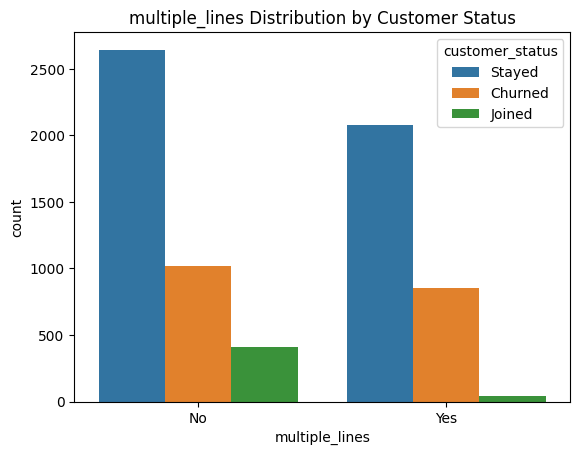

In [86]:

# Filter the DataFrame where 'internet_type' is 'Fiber Optic'
temp = result[result['internet_type'] == 'Fiber Optic']

# Categorical columns to analyze
cat = [ 'online_security', 'online_backup', 
       'device_protection', 'premium_tech_support', 'unlimited_data', 
       'streaming_movies', 'streaming_music','multiple_lines']

# Plot distribution by 'customer_status'
for col in cat:
    sns.countplot(data=temp, x=col, hue='customer_status')
    plt.title(f'{col} Distribution by Customer Status')
    plt.show()


### Insights:

Customers with Fiber Optic internet are churning mainly due to Online Security, Online Back, Device Protection & Tech Support. 


### Average Satisfaction Score by Internet Type

In [6]:
temp = result[result['internet_type'] == 'Fiber Optic']


In [9]:
temp = result.groupby('internet_type').agg({
    'satisfaction_score': 'mean'

})

temp

,satisfaction_score
internet_type,
Cable,3.154217
DSL,3.300847
Fiber Optic,2.935420


#### As theorized Fiber Optic internet seems to have a big hand in churning customers